# Statsmodels test drive 

Reference: https://www.statsmodels.org/devel/regression.html


In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.core.pylabtools import figsize

%matplotlib inline
figsize(6, 6)


In [13]:
df = sns.load_dataset('iris')  # seaborn has some example datasets 
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
df.shape

(150, 5)

Text(0, 0.5, 'sepal_length')

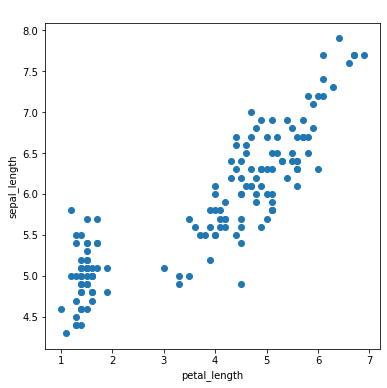

In [15]:
fig, ax = plt.subplots()

ax.scatter(df['petal_length'], df['sepal_length']) 

ax.set_title(' ')
ax.set_xlabel('petal_length')
ax.set_ylabel('sepal_length') 

In [16]:
df2 = df[df['petal_length'] > 2]

Text(0, 0.5, 'sepal_length')

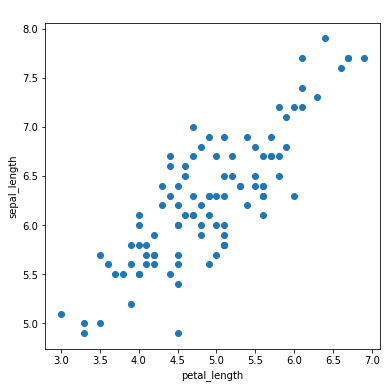

In [17]:
fig, ax = plt.subplots()

ax.scatter(df2['petal_length'], df2['sepal_length']) 

ax.set_title(' ')
ax.set_xlabel('petal_length')
ax.set_ylabel('sepal_length') 

In [18]:

# Not recommended: 
# X = df2['petal_length']
# y = df2['sepal_length']
# m1 = sm.OLS(endog = y, exog = X)

# Better approach: R-style formulas 
m1 = smf.ols(formula='sepal_length ~ petal_length - 1', data=df2)  # -1 drops the intercept 
m1_rsult = m1.fit()
print(m1_rsult.summary())

OLS Regression Results                                
Dep. Variable:           sepal_length   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          1.019e+04
Date:                Mon, 09 Dec 2019   Prob (F-statistic):                   1.22e-101
Time:                        19:09:42   Log-Likelihood:                         -93.729
No. Observations:                 100   AIC:                                      189.5
Df Residuals:                      99   BIC:                                      192.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

**Note that by default there's no constant in the model**

In [19]:
# Not recommended: 
# X = sm.add_constant(df2['petal_length'])
# y = df2['sepal_length']
# m2 = sm.OLS(endog = y, exog = X)

# Better approach: R-style formulas
m2 = smf.ols(formula='sepal_length ~ petal_length', data=df2)
m2_rsult = m2.fit()
print(m2_rsult.summary())

OLS Regression Results                            
Dep. Variable:           sepal_length   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     214.5
Date:                Mon, 09 Dec 2019   Prob (F-statistic):           2.04e-26
Time:                        19:09:42   Log-Likelihood:                -42.290
No. Observations:                 100   AIC:                             88.58
Df Residuals:                      98   BIC:                             93.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.9987      0.226     13.273      0.000       2.550       3

In [20]:
# Not recommended: 
# X = sm.add_constant(df2[['petal_length', 'sepal_width']])
# y = df2['sepal_length']
# m3 = sm.OLS(endog = y, exog = X)

# Better approach: R-style formulas
m3 = smf.ols(formula='sepal_length ~ petal_length + sepal_width', data=df2)
m3_rsult = m3.fit()
print(m3_rsult.summary())

OLS Regression Results                            
Dep. Variable:           sepal_length   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     117.1
Date:                Mon, 09 Dec 2019   Prob (F-statistic):           1.35e-26
Time:                        19:09:42   Log-Likelihood:                -38.859
No. Observations:                 100   AIC:                             83.72
Df Residuals:                      97   BIC:                             91.53
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.3785      0.322      7.377      0.000       1.739       3

# Regression with categorical variables 

**Apparently we can't directly enter nominal variables? The following will fail:**

In [21]:
# X = sm.add_constant(df2[['petal_length', 'species']])
# y = df2['sepal_length']

# m1 = sm.OLS(endog = y, exog = X)
# m1_rsult = m1.fit()
# print(m1_rsult.summary())

Instead, let's try the formula interface with `patsy`. 

Reference: https://www.statsmodels.org/dev/example_formulas.html

In [22]:
m4 = smf.ols(formula='sepal_length ~ petal_length + species', data=df2)
m4_result = m4.fit()
print(m4_result.summary())


OLS Regression Results                            
Dep. Variable:           sepal_length   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     146.4
Date:                Mon, 09 Dec 2019   Prob (F-statistic):           5.03e-30
Time:                        19:09:42   Log-Likelihood:                -30.719
No. Observations:                 100   AIC:                             67.44
Df Residuals:                      97   BIC:                             75.25
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.9940      0.284      7.011      0

## Note on Rsq values with and without intercept 

See [here](https://rpubs.com/nayefahmad/rsq-with-and-without-intercept)